In [ ]:
import pandas as pd
import numpy as np
import sklearn.metrics
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/UFRGS/mestrado/aprendizagem de máquina/Trabalho ML/modelos_jesus/data_modelo.csv',sep=';',decimal=',')

In [ ]:
#pre porcessamento variaveis categoricas

data = pd.concat([data,pd.get_dummies(data['LOCATION'])],axis=1)
data = pd.concat([data,pd.get_dummies(data['RUA/AV'])],axis=1)

In [ ]:
data['LON_STREET'] = data['LON_STREET'].astype(float)
data['LAT_STREET'] = data['LAT_STREET'].astype(float)

In [ ]:
x = data[['APTO','CASA', 'AREA_z', 'QUARTO_z', 'GARAGEM_z', 'BANHEIRO_z',
       'cluster', 'fator_loc','MOBILIADO','AREA','LAT_STREET',
       'LON_STREET',
    'ABERTA DOS MORROS',    'AGRONOMIA',    'ALTO PETROPOLIS',    'ALTO TERESOPOLIS',
    'AUXILIADORA',    'AZENHA',    'BELA VISTA',    'BELEM NOVO',    'BOA VISTA',
    'BOM FIM',    'BOM JESUS',    'CAMAQUA',    'CAMPO NOVO',    'CASCATA',
    'CAVALHADA',    'CENTRO HISTORICO',    'CHACARA DAS PEDRAS',    'CHAPEU DO SOL',
    'CIDADE BAIXA',    'CORONEL APARICIO BORGES',    'COSTA E SILVA',    'CRISTAL',
    'CRISTO REDENTOR',    'ECOVILLE',    'ESPIRITO SANTO',    'FARRAPOS',
    'FARROUPILHA',    'FLORESTA',    'GLORIA',    'GUARUJA',    'HIGIENOPOLIS',
    'HIPICA',    'HUMAITA',    'INDEPENDENCIA',    'IPANEMA',    'JARDIM BOTANICO',
    'JARDIM CARVALHO',    'JARDIM DO SALSO',    'JARDIM EUROPA',    'JARDIM FLORESTA',
    'JARDIM ISABEL',    'JARDIM ITU',    'JARDIM ITU SABARA',    'JARDIM LEOPOLDINA',
    'JARDIM LINDOIA',    'JARDIM PLANALTO',    'JARDIM SABARA',
    'JARDIM SAO PEDRO',    'LOMBA DO PINHEIRO',    'MARIO QUINTANA',
    'MEDIANEIRA',    'MENINO DEUS',    'MOINHOS DE VENTO',    'MONT SERRAT',
    'MORRO SANTANA',    'NAVEGANTES',    'NONOAI',    'PARQUE SANTA FE',
    'PARTENON',    'PASSO DA AREIA',    'PASSO DAS PEDRAS',    'PEDRA REDONDA',
    'PETROPOLIS',    'PONTA GROSSA',    'PRAIA DE BELAS',    'PROTASIO ALVES',
    'RESTINGA',    'RIO BRANCO',    'RUBEM BERTA',    'SANTA CECILIA',
    'SANTA MARIA GORETTI',    'SANTA ROSA DE LIMA',    'SANTA TEREZA',
    'SANTANA',    'SANTO ANTONIO',    'SAO GERALDO',    'SAO JOAO',
    'SAO SEBASTIAO',    'SARANDI',    'SERRARIA',    'TERESOPOLIS',
    'TRES FIGUEIRAS',    'TRISTEZA',    'VILA ASSUNCAO',    'VILA CONCEICAO',
    'VILA IPIRANGA',    'VILA JARDIM',    'VILA JOAO PESSOA',    'VILA NOVA',
    'VILA SAO JOSE',    'ACESSO',    'ALAMEDA',    'AVENIDA',    'BECO',
    'ESTRADA',    'LARGO',    'PRACA',    'RUA',    'TRAVESSA']]

In [ ]:
y = data['VALORES']

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=0)

In [ ]:

models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor()
}

In [ ]:

param_grids = {
    'Linear Regression': {},
    'SVR': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'XGBoost': {'learning_rate': [1, 0.01], 'n_estimators': [100, 200]},
    'Decision Tree': {'max_depth': [5, 10, 20]},
    'KNN': {'n_neighbors': [3, 5, 7]}
}


In [ ]:
# grid_search = GridSearchCV(SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(x, y)
# grid_search.best_estimator_

In [ ]:
import pickle

In [ ]:
y.std()

2777.8966533799876

In [ ]:
#sklearn.metrics.get_scorer_names()
# Executar a validação cruzada

results = {}
best_models = {}

for model_name, model in models.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error')
    grid_search.fit(x, y)

    results[model_name] = grid_search.cv_results_
    best_models[model_name] = grid_search.best_estimator_
    print(model_name)

Linear Regression
SVR
XGBoost
Decision Tree
KNN


In [ ]:


save_directory = '/content/drive/MyDrive/UFRGS/mestrado/aprendizagem de máquina/Trabalho ML/modelos_jesus/modelos_pickle/'

for model_name, result in results.items():
    best_index = np.argmax(result['mean_test_score'])  # Find the index with the highest score
    print(f"{model_name} - Best Parameters: {best_models[model_name].get_params()}")
    print(f"{model_name} - Best Negative MSE: {result['mean_test_score'][best_index]:.4f}")

        # Save the best model to a file using pickle
    filename = f"{save_directory}best_{model_name}.pkl"
    with open(filename, 'wb') as file:
        pickle.dump(best_models[model_name], file)
    print(f"{model_name} - Best model saved to {filename}")

Linear Regression - Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Linear Regression - Best Negative MSE: -16516419946.1280
Linear Regression - Best model saved to /content/drive/MyDrive/UFRGS/mestrado/aprendizagem de máquina/Trabalho ML/modelos_jesus/modelos_pickle/best_Linear Regression.pkl
SVR - Best Parameters: {'C': 10, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
SVR - Best Negative MSE: -862.7681
SVR - Best model saved to /content/drive/MyDrive/UFRGS/mestrado/aprendizagem de máquina/Trabalho ML/modelos_jesus/modelos_pickle/best_SVR.pkl
XGBoost - Best Parameters: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'featur

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:
import pickle

save_directory = '/content/drive/MyDrive/UFRGS/mestrado/aprendizagem de máquina/Trabalho ML/modelos_jesus/modelos_pickle/'

# Dictionary to hold loaded models
loaded_models = {}

# List of model names
model_names = ['Linear Regression', 'SVR', 'XGBoost', 'Decision Tree', 'KNN']

# Load the saved models
for model_name in model_names:
    filename = f"{save_directory}best_{model_name}.pkl"
    with open(filename, 'rb') as file:
        loaded_model = pickle.load(file)
        loaded_models[model_name] = loaded_model

# Now you can access and use the loaded models as needed
# For example:
loaded_svr_model = loaded_models['SVR']
loaded_xgboost_model = loaded_models['XGBoost']

representação shapley

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 4.6 MB/s eta 0:00:00


In [ ]:
best_models['XGBoost']

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
import shap

In [ ]:
data.head()

,Unnamed: 0,TIPO,OFERTA,VALORES,VALORES_PROMO,RUA/AV,LOGRADOURO,LOCATION,CITY,STATE,...,VILA SAO JOSE,ACESSO,ALAMEDA,AVENIDA,BECO,ESTRADA,LARGO,PRACA,RUA,TRAVESSA
0,0,APARTAMENTO,ALUGAR,2943,2200,AVENIDA,PROTASIO ALVES,PETROPOLIS,PORTO ALEGRE,RS,...,0,0,0,1,0,0,0,0,0,0
1,1,APARTAMENTO,ALUGAR,3098,2490,RUA,DOUTOR ARMANDO BARBEDO,TRISTEZA,PORTO ALEGRE,RS,...,0,0,0,0,0,0,0,0,1,0
2,2,APARTAMENTO,ALUGAR,4400,3960,RUA,MACHADO DE ASSIS,JARDIM BOTANICO,PORTO ALEGRE,RS,...,0,0,0,0,0,0,0,0,1,0
3,3,APARTAMENTO,ALUGAR,1500,1350,RUA,DOMINGOS MARTINS,CRISTO REDENTOR,PORTO ALEGRE,RS,...,0,0,0,0,0,0,0,0,1,0
4,4,APARTAMENTO,ALUGAR,6391,4800,AVENIDA,LAGEADO,PETROPOLIS,PORTO ALEGRE,RS,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
x.head()

,APTO,CASA,AREA_z,QUARTO_z,GARAGEM_z,BANHEIRO_z,MOBILIADO_z,cluster,fator_loc,MOBILIADO,...,VILA SAO JOSE,ACESSO,ALAMEDA,AVENIDA,BECO,ESTRADA,LARGO,PRACA,RUA,TRAVESSA
0,1,0,-0.207339,0.125337,1.513695,-0.549706,-0.367203,2,10.399459,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,-0.512790,-1.052830,0.381953,-0.549706,-0.367203,1,3.565638,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0.031709,0.125337,1.513695,-0.549706,-0.367203,2,6.528515,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,-0.300303,-1.052830,-0.749790,-0.549706,-0.367203,1,7.963383,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,-0.472949,-1.052830,0.381953,0.583803,-0.367203,1,11.282042,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
y[1]

3098

In [ ]:
loaded_svr_model

TypeError: ignored

 96%|=================== | 2039/2123 [00:17<00:00]       

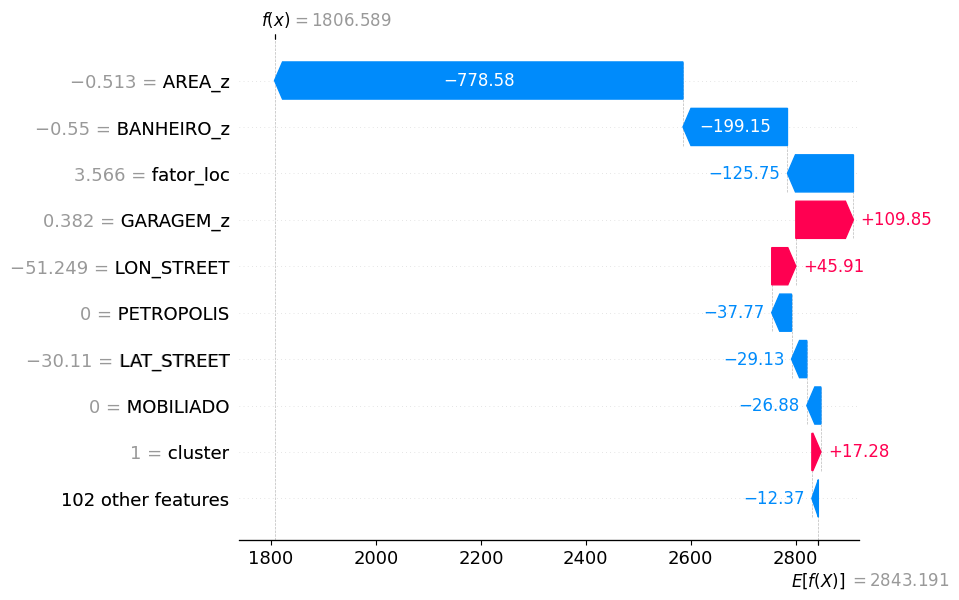

In [ ]:

explainer = shap.Explainer(best_models['XGBoost'], x)

shap_values = explainer(x)

shap.plots.waterfall(shap_values[1])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


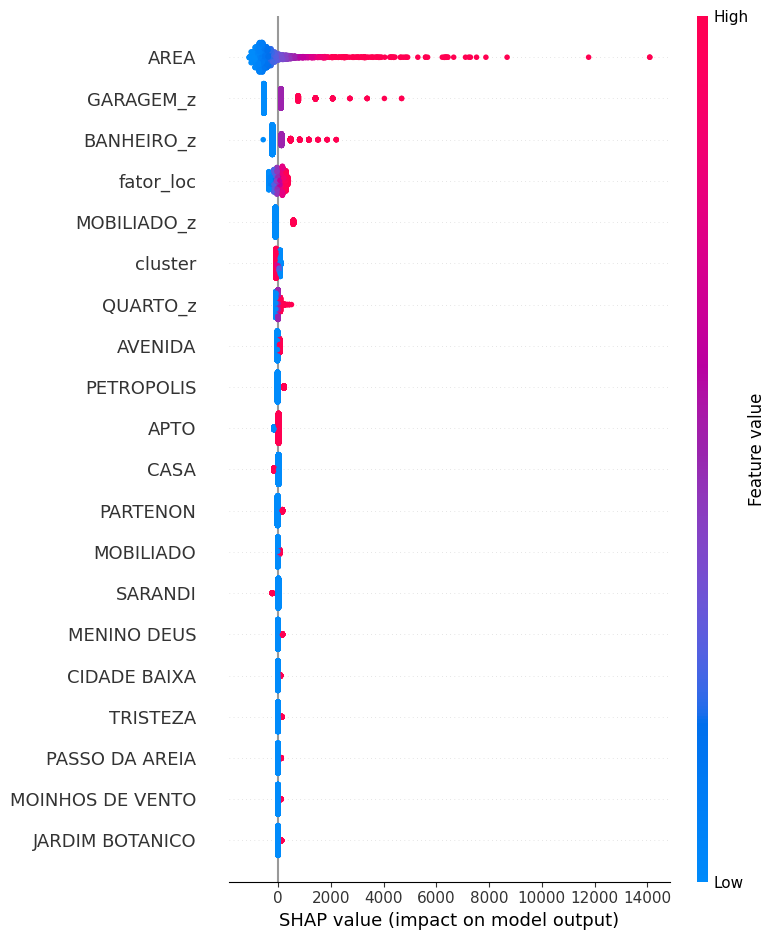

In [ ]:
shap.summary_plot(shap_values, x)